In [1]:
print('hello')

hello


In [2]:
import requests
import sqlite3
import re
import pandas as pd
from bs4 import BeautifulSoup

# 제무제표

## id와 ens 값 찾기

In [3]:
url_tmp = "https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd=005930"

In [4]:
r_tmp = requests.get(url_tmp)

In [5]:
r_tmp.text.find('encparam')

52731

In [6]:
r_tmp.text.find("id:")

66662

In [7]:
r_tmp.text[66600:666700]

'cparam: \'RHovcWJVSlNTOERzZElWaWl2dVBCZz09\'\r\n                , id: \'ZTRzQlVCd0\' ? \'ZTRzQlVCd0\' : \'\'\r\n\t\t\t\t},\r\n\t\t\t\tsuccess: function (data) {\r\n\t\t\t\t\tgtag(\'config\', \'UA-74989022-7\', {\'page_path\': \'/company/ajax/cF1001.aspx\'});\r\n\t\t\t\t\t$(\'#ZTRzQlVCd0\').html(data);\r\n\t\t\t\t\tif(extQ==0)\r\n\t\t\t\t\t{\r\n\t\t\t\t\t\t$(\'.r02c07\').addClass(\'endLine\')\r\n\t\t\t\t\t}\r\n\t\t\t\t\t// 재무 컬럼 펼치기\r\n\t\t\t\t\t$(\'.btn_moreY\').click(function(){\r\n\t\t\t\t\t\tif($(this).data(\'ext\')==0){\r\n\t\t\t\t\t\t\tgetAddInfoData01(1, $(\'.btn_moreQ\').data(\'ext\'));\r\n\t\t\t\t\t\t\t$(this).data(\'ext\',1);\r\n\t\t\t\t\t\t}\r\n\t\t\t\t\t\telse{\r\n\t\t\t\t\t\t\tgetAddInfoData01(0, $(\'.btn_moreQ\').data(\'ext\'));\r\n\t\t\t\t\t\t\t$(this).data(\'ext\',0);\r\n\t\t\t\t\t\t}\r\n\t\t\t\t\t});\r\n\t\t\t\t\t$(\'.btn_moreQ\').click(function(){\r\n\t\t\t\t\t\tif($(this).data(\'ext\')==0){\r\n\t\t\t\t\t\t\tgetAddInfoData01($(\'.btn_moreY\').data(\'ext\'),1);\r\n\t\t

In [8]:
pattern_enc = re.compile("encparam: '(.+)'")
pattern_id = re.compile("id: '(.+?)'")

In [9]:
target_text = r_tmp.text

In [10]:
encparam = pattern_enc.search(target_text)[1]

In [11]:
id_ = pattern_id.search(target_text)[1]

In [12]:
id_

'ZTRzQlVCd0'

In [13]:
encparam

'RHovcWJVSlNTOERzZElWaWl2dVBCZz09'

freq_typ
A : 전체
Y : 연간
Q : 분기
fin_type
주재무제표 : 0
K-IFRS(별도) : 3
K-IFRS(연결) : 4
K-GAAP(개별) : 1
K-GAAP(연결) : 2

In [14]:
payload = {}

In [15]:
payload['cmp_cd'] = '005930'
payload['fin_typ'] = 0
payload['freq_typ'] = 'A'
payload['encparam'] = encparam
payload['id'] = id_

In [16]:
head = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.75 Safari/537.36',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Language': 'ko-KR,ko;q=0.8,en-US;q=0.6,en;q=0.4',
    'Accept-Encoding': 'gzip, deflate, sdch, br',
    'Content-Type': 'application/json',
    'Referer' : "https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd=005930",
    'X-Requested-With': 'XMLHttpRequest',
    'Connection':'keep-alive'
}

Accept:text/html, */*; q=0.01
Accept-Encoding:gzip, deflate, sdch, br
Accept-Language:ko-KR,ko;q=0.8,en-US;q=0.6,en;q=0.4
Connection:keep-alive
Cookie:setC1010001=%5B%7B%22conGubun%22%3A%22MAIN%22%2C%22cTB23%22%3A%22cns_td1%22%2C%22bandChartGubun%22%3A%22MAIN%22%2C%22finGubun%22%3A%22MAIN%22%2C%22cTB00%22%3A%22cns_td21%22%7D%5D; ASP.NET_SessionId=5dxkje4uau3x1v4qoj0cuoxy; _gat_gtag_UA_74989022_7=1; _ga=GA1.3.2012521901.1576975820; _gid=GA1.3.596358835.1576975820
Host:navercomp.wisereport.co.kr
Referer:https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd=005930
User-Agent:Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.75 Safari/537.36
X-Requested-With:XMLHttpRequest

In [17]:
payload

{'cmp_cd': '005930',
 'fin_typ': 0,
 'freq_typ': 'A',
 'encparam': 'RHovcWJVSlNTOERzZElWaWl2dVBCZz09',
 'id': 'ZTRzQlVCd0'}

In [18]:
financial_url = "https://navercomp.wisereport.co.kr/v2/company/ajax/cF1001.aspx?"

In [19]:
r = requests.get(financial_url, params=payload, headers = head)

In [20]:
r.text

'<table class="hZTRzQlVCd0 gHead01 all-width" summary="주요재무정보를 제공합니다."><caption class="blind">"주요재무정보"</caption><thead><tr><th>5066</th><th>5066</th><th>5066</th><th>5066</th><th>5066</th><th>5066</th><th>5066</th><th>5066</th><th>5066</th></tr></thead><tbody><tr><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td></tr><tr><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td></tr><tr><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td></tr><tr><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td></tr><tr><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td></tr><tr><td>5,066</td><td>5,066</td><td>5,066</td><td>5,066</td><td>5

In [21]:
financial = pd.read_html(r.text)[1]

In [22]:
financial

주요재무정보        연간연간컨센서스보기                                      \
        주요재무정보 2016/12  (IFRS연결) 2017/12  (IFRS연결) 2018/12  (IFRS연결)   
0          매출액      2.018667e+06      2.395754e+06      2.437714e+06   
1         영업이익      2.924070e+05      5.364500e+05      5.888670e+05   
2   영업이익(발표기준)      2.924070e+05      5.364500e+05      5.888670e+05   
3     세전계속사업이익      3.071370e+05      5.619600e+05      6.116000e+05   
4        당기순이익      2.272610e+05      4.218670e+05      4.434490e+05   
5    당기순이익(지배)      2.241570e+05      4.134460e+05      4.389090e+05   
6   당기순이익(비지배)      3.104000e+03      8.422000e+03               NaN   
7         자산총계      2.621743e+06      3.017521e+06      3.393572e+06   
8         부채총계      6.921130e+05      8.726070e+05      9.160410e+05   
9         자본총계      1.929630e+06      2.144914e+06      2.477532e+06   
10    자본총계(지배)      1.864243e+06      2.072134e+06      2.400690e+06   
11   자본총계(비지배)      6.538700e+04      7.278000e+04               NaN   
12         자본금      8.975000e+03      8.975000e+03      8.975000e+03   
13    영업활동현금흐름      4.738560e+05      6.216200e+05      6.703190e+05   
14    투자활동현금흐름     -2.965870e+05     -4.938520e+05     -5.224050e+05   
15    재무활동현금흐름     -8.669500e+04     -1.256090e+05     -1.509020e+05   
16       CAPEX      2.414300e+05      4.279220e+05      2.955640e+05   
17         FCF      2.324270e+05      1.936980e+05      3.747550e+05   
18      이자발생부채      1.528240e+05      1.881400e+05      1.466710e+05   
19       영업이익률      1.449000e+01      2.239000e+01      2.416000e+01   
20        순이익률      1.126000e+01      1.761000e+01      1.819000e+01   
21      ROE(%)      1.248000e+01      2.101000e+01      1.963000e+01   
22      ROA(%)      9.010000e+00      1.496000e+01      1.383000e+01   
23        부채비율      3.587000e+01      4.068000e+01      3.697000e+01   
24       자본유보율      2.200414e+04      2.453612e+04      2.753192e+04   
25      EPS(원)      2.735000e+03      5.421000e+03      6.024000e+03   
26      PER(배)      1.318000e+01      9.400000e+00      6.420000e+00   
27      BPS(원)      2.663600e+04      3.042700e+04      3.534200e+04   
28      PBR(배)      1.350000e+00      1.670000e+00      1.090000e+00   
29    현금DPS(원)      5.700000e+02      8.500000e+02      1.416000e+03   
30     현금배당수익률      1.580000e+00      1.670000e+00      3.660000e+00   
31   현금배당성향(%)      1.781000e+01      1.409000e+01      2.192000e+01   
32  발행주식수(보통주)      7.033967e+09      6.454925e+09      5.969783e+09   

                               분기분기컨센서스보기                                      \
   2019/12(E)  (IFRS연결) 2019/03  (IFRS연결) 2019/06  (IFRS연결) 2019/09  (IFRS연결)   
0            2315239.00      5.238550e+05      5.612710e+05      6.200350e+05   
1             271494.00      6.233300e+04      6.597100e+04      7.777900e+04   
2                   NaN      6.233300e+04      6.597100e+04      7.777900e+04   
3             299940.00      6.913000e+04      7.179400e+04      8.620700e+04   
4             219523.00      5.043600e+04      5.180600e+04      6.287700e+04   
5             216934.00      5.107500e+04      5.064500e+04      6.105000e+04   
6                   NaN               NaN               NaN               NaN   
7            3540556.00      3.450679e+06      3.429401e+06      3.533860e+06   
8             914544.00      9.185270e+05      8.519310e+05      8.994370e+05   
9            2626011.00      2.532152e+06      2.577470e+06      2.634422e+06   
10           2544224.00      2.454998e+06      2.498927e+06      2.554034e+06   
11                  NaN               NaN               NaN               NaN   
12              8979.00      8.975000e+03      8.975000e+03      8.975000e+03   
13            448732.00      5.244300e+04      6.594900e+04      1.382660e+05   
14           -312294.00     -5.244600e+04     -3.284100e+04     -1.293360e+05   
15           -106249.00     -4.097500e+04     -2.778600e+04     -2.203300e+04   
16            283014.00      

In [23]:
financial.transpose()

0       1           2         3   \
주요재무정보     주요재무정보                        매출액    영업이익  영업이익(발표기준)  세전계속사업이익   
연간연간컨센서스보기 2016/12  (IFRS연결)     2.01867e+06  292407      292407    307137   
           2017/12  (IFRS연결)     2.39575e+06  536450      536450    561960   
           2018/12  (IFRS연결)     2.43771e+06  588867      588867    611600   
           2019/12(E)  (IFRS연결)  2.31524e+06  271494         NaN    299940   
분기분기컨센서스보기 2019/03  (IFRS연결)          523855   62333       62333     69130   
           2019/06  (IFRS연결)          561271   65971       65971     71794   
           2019/09  (IFRS연결)          620035   77779       77779     86207   
           2019/12(E)  (IFRS연결)       610988   65719         NaN     70900   

                                     4          5           6            7   \
주요재무정보     주요재무정보                 당기순이익  당기순이익(지배)  당기순이익(비지배)         자산총계   
연간연간컨센서스보기 2016/12  (IFRS연결)     227261     224157        3104  2.62174e+06   
           2017/12  (IFRS연결)     421867     413446        8422  3.01752e+06   
           2018/12  (IFRS연결)     443449     438909         NaN  3.39357e+06   
           2019/12(E)  (IFRS연결)  219523     216934         NaN  3.54056e+06   
분기분기컨센서스보기 2019/03  (IFRS연결)      50436      51075         NaN  3.45068e+06   
           2019/06  (IFRS연결)      51806      50645         NaN   3.4294e+06   
           2019/09  (IFRS연결)      62877      61050         NaN  3.53386e+06   
           2019/12(E)  (IFRS연결)   55812      48346         NaN  3.54056e+06   

                                     8            9   ...     23       24  \
주요재무정보     주요재무정보                  부채총계         자본총계  ...   부채비율    자본유보율   
연간연간컨센서스보기 2016/12  (IFRS연결)     692113  1.92963e+06  ...  35.87  22004.1   
           2017/12  (IFRS연결)     872607  2.14491e+06  ...  40.68  24536.1   
           2018/12  (IFRS연결)     916041  2.47753e+06  ...  36.97  27531.9   
           2019/12(E)  (IFRS연결)  914544  2.62601e+06  ...  34.83      NaN   
분기분기컨센서스보기 2019/03  (IFRS연결)     918527  2.53215e+06  ...  36.27    27833   
           2019/06  (IFRS연결)     851931  2.57747e+06  ...  33.05  28129.3   
           2019/09  (IFRS연결)     899437  2.63442e+06  ...  34.14  28541.6   
           2019/12(E)  (IFRS연결)  914544  2.62601e+06  ...  34.83      NaN   

                                     25      26      27      28        29  \
주요재무정보     주요재무정보                EPS(원)  PER(배)  BPS(원)  PBR(배)  현금DPS(원)   
연간연간컨센서스보기 2016/12  (IFRS연결)       2735   13.18   26636    1.35       570   
           2017/12  (IFRS연결)       5421     9.4   30427    1.67       850   
           2018/12  (IFRS연결)       6024    6.42   35342    1.09      1416   
           2019/12(E)  (IFRS연결)    3194   17.53   37455     1.5      1419   
분기분기컨센서스보기 2019/03  (IFRS연결)        752    8.54   36142    1.24       354   
           2019/06  (IFRS연결)        746   10.48   36789    1.28       354   
           2019/09  (IFRS연결)        899   13.73   37600     1.3       354   
           2019/12(E)  (IFRS연결)     712     NaN   37455     1.5       NaN   

                                      30         31           32  
주요재무정보     주요재무정보                현금배당수익률  현금배당성향(%)   발행주식수(보통주)  
연간연간컨센서스보기 2016/12  (IFRS연결)        1.58      17.81  7.03397e+09  
           2017/12  (IFRS연결)        1.67      14.09  6.45492e+09  
           2018/12  (IFRS연결)        3.66      21.92  5.96978e+09  
           2019/12(E)  (IFRS연결)     2.53      39.04          NaN  
분기분기컨센서스보기 2019/03  (IFRS연결)         NaN      47.08  5.96978e+09  
           2019/06  (IFRS연결)         NaN      47.48  5.96978e+09  
           2019/09  (IFRS연결)         NaN      39.39  5.96978e+09  
           2019/12(E)  (IFRS연결)      NaN        NaN          NaN  

[9 rows x 33 columns]

In [24]:
financial.transpose().reset_index()

,level_0,level_1,0,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,32
0,주요재무정보,주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
1,연간연간컨센서스보기,2016/12 (IFRS연결),2.01867e+06,292407,292407,307137,227261,224157,3104,2.62174e+06,...,35.87,22004.1,2735,13.18,26636,1.35,570,1.58,17.81,7.03397e+09
2,연간연간컨센서스보기,2017/12 (IFRS연결),2.39575e+06,536450,536450,561960,421867,413446,8422,3.01752e+06,...,40.68,24536.1,5421,9.4,30427,1.67,850,1.67,14.09,6.45492e+09
3,연간연간컨센서스보기,2018/12 (IFRS연결),2.43771e+06,588867,588867,611600,443449,438909,NaN,3.39357e+06,...,36.97,27531.9,6024,6.42,35342,1.09,1416,3.66,21.92,5.96978e+09
4,연간연간컨센서스보기,2019/12(E) (IFRS연결),2.31524e+06,271494,NaN,299940,219523,216934,NaN,3.54056e+06,...,34.83,NaN,3194,17.53,37455,1.5,1419,2.53,39.04,NaN
5,분기분기컨센서스보기,2019/03 (IFRS연결),523855,62333,62333,69130,50436,51075,NaN,3.45068e+06,...,36.27,27833,752,8.54,36142,1.24,354,NaN,47.08,5.96978e+09
6,분기분기컨센서스보기,2019/06 (IFRS연결),561271,65971,65971,71794,51806,50645,NaN,3.4294e+06,...,33.05,28129.3,746,10.48,36789,1.28,354,NaN,47.48,5.96978e+09
7,분기분기컨센서스보기,2019/09 (IFRS연결),620035,77779,77779,86207,62877,61050,NaN,3.53386e+06,...,34.14,28541.6,899,13.73,37600,1.3,354,NaN,39.39,5.96978e+09
8,분기분기컨센서스보기,2019/12(E) (IFRS연결),610988,65719,NaN,70900,55812,48346,NaN,3.54056e+06,...,34.83,NaN,712,NaN,37455,1.5,NaN,NaN,NaN,NaN


In [25]:
financial_trans = financial.transpose().reset_index()

In [26]:
financial_trans

,level_0,level_1,0,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,32
0,주요재무정보,주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
1,연간연간컨센서스보기,2016/12 (IFRS연결),2.01867e+06,292407,292407,307137,227261,224157,3104,2.62174e+06,...,35.87,22004.1,2735,13.18,26636,1.35,570,1.58,17.81,7.03397e+09
2,연간연간컨센서스보기,2017/12 (IFRS연결),2.39575e+06,536450,536450,561960,421867,413446,8422,3.01752e+06,...,40.68,24536.1,5421,9.4,30427,1.67,850,1.67,14.09,6.45492e+09
3,연간연간컨센서스보기,2018/12 (IFRS연결),2.43771e+06,588867,588867,611600,443449,438909,NaN,3.39357e+06,...,36.97,27531.9,6024,6.42,35342,1.09,1416,3.66,21.92,5.96978e+09
4,연간연간컨센서스보기,2019/12(E) (IFRS연결),2.31524e+06,271494,NaN,299940,219523,216934,NaN,3.54056e+06,...,34.83,NaN,3194,17.53,37455,1.5,1419,2.53,39.04,NaN
5,분기분기컨센서스보기,2019/03 (IFRS연결),523855,62333,62333,69130,50436,51075,NaN,3.45068e+06,...,36.27,27833,752,8.54,36142,1.24,354,NaN,47.08,5.96978e+09
6,분기분기컨센서스보기,2019/06 (IFRS연결),561271,65971,65971,71794,51806,50645,NaN,3.4294e+06,...,33.05,28129.3,746,10.48,36789,1.28,354,NaN,47.48,5.96978e+09
7,분기분기컨센서스보기,2019/09 (IFRS연결),620035,77779,77779,86207,62877,61050,NaN,3.53386e+06,...,34.14,28541.6,899,13.73,37600,1.3,354,NaN,39.39,5.96978e+09
8,분기분기컨센서스보기,2019/12(E) (IFRS연결),610988,65719,NaN,70900,55812,48346,NaN,3.54056e+06,...,34.83,NaN,712,NaN,37455,1.5,NaN,NaN,NaN,NaN


In [27]:
financial_trans.columns = financial_trans.loc[0]

In [28]:
financial_trans

,주요재무정보,주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
0,주요재무정보,주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
1,연간연간컨센서스보기,2016/12 (IFRS연결),2.01867e+06,292407,292407,307137,227261,224157,3104,2.62174e+06,...,35.87,22004.1,2735,13.18,26636,1.35,570,1.58,17.81,7.03397e+09
2,연간연간컨센서스보기,2017/12 (IFRS연결),2.39575e+06,536450,536450,561960,421867,413446,8422,3.01752e+06,...,40.68,24536.1,5421,9.4,30427,1.67,850,1.67,14.09,6.45492e+09
3,연간연간컨센서스보기,2018/12 (IFRS연결),2.43771e+06,588867,588867,611600,443449,438909,NaN,3.39357e+06,...,36.97,27531.9,6024,6.42,35342,1.09,1416,3.66,21.92,5.96978e+09
4,연간연간컨센서스보기,2019/12(E) (IFRS연결),2.31524e+06,271494,NaN,299940,219523,216934,NaN,3.54056e+06,...,34.83,NaN,3194,17.53,37455,1.5,1419,2.53,39.04,NaN
5,분기분기컨센서스보기,2019/03 (IFRS연결),523855,62333,62333,69130,50436,51075,NaN,3.45068e+06,...,36.27,27833,752,8.54,36142,1.24,354,NaN,47.08,5.96978e+09
6,분기분기컨센서스보기,2019/06 (IFRS연결),561271,65971,65971,71794,51806,50645,NaN,3.4294e+06,...,33.05,28129.3,746,10.48,36789,1.28,354,NaN,47.48,5.96978e+09
7,분기분기컨센서스보기,2019/09 (IFRS연결),620035,77779,77779,86207,62877,61050,NaN,3.53386e+06,...,34.14,28541.6,899,13.73,37600,1.3,354,NaN,39.39,5.96978e+09
8,분기분기컨센서스보기,2019/12(E) (IFRS연결),610988,65719,NaN,70900,55812,48346,NaN,3.54056e+06,...,34.83,NaN,712,NaN,37455,1.5,NaN,NaN,NaN,NaN


## 0행 제거

In [29]:
financial_trans.drop([0], inplace=True)

In [30]:
financial_trans

,주요재무정보,주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
1,연간연간컨센서스보기,2016/12 (IFRS연결),2.01867e+06,292407,292407,307137,227261,224157,3104,2.62174e+06,...,35.87,22004.1,2735,13.18,26636,1.35,570,1.58,17.81,7.03397e+09
2,연간연간컨센서스보기,2017/12 (IFRS연결),2.39575e+06,536450,536450,561960,421867,413446,8422,3.01752e+06,...,40.68,24536.1,5421,9.4,30427,1.67,850,1.67,14.09,6.45492e+09
3,연간연간컨센서스보기,2018/12 (IFRS연결),2.43771e+06,588867,588867,611600,443449,438909,NaN,3.39357e+06,...,36.97,27531.9,6024,6.42,35342,1.09,1416,3.66,21.92,5.96978e+09
4,연간연간컨센서스보기,2019/12(E) (IFRS연결),2.31524e+06,271494,NaN,299940,219523,216934,NaN,3.54056e+06,...,34.83,NaN,3194,17.53,37455,1.5,1419,2.53,39.04,NaN
5,분기분기컨센서스보기,2019/03 (IFRS연결),523855,62333,62333,69130,50436,51075,NaN,3.45068e+06,...,36.27,27833,752,8.54,36142,1.24,354,NaN,47.08,5.96978e+09
6,분기분기컨센서스보기,2019/06 (IFRS연결),561271,65971,65971,71794,51806,50645,NaN,3.4294e+06,...,33.05,28129.3,746,10.48,36789,1.28,354,NaN,47.48,5.96978e+09
7,분기분기컨센서스보기,2019/09 (IFRS연결),620035,77779,77779,86207,62877,61050,NaN,3.53386e+06,...,34.14,28541.6,899,13.73,37600,1.3,354,NaN,39.39,5.96978e+09
8,분기분기컨센서스보기,2019/12(E) (IFRS연결),610988,65719,NaN,70900,55812,48346,NaN,3.54056e+06,...,34.83,NaN,712,NaN,37455,1.5,NaN,NaN,NaN,NaN


In [31]:
financial_trans['종목코드'] = '005930'

In [32]:
financial_trans

,주요재무정보,주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,...,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주),종목코드
1,연간연간컨센서스보기,2016/12 (IFRS연결),2.01867e+06,292407,292407,307137,227261,224157,3104,2.62174e+06,...,22004.1,2735,13.18,26636,1.35,570,1.58,17.81,7.03397e+09,005930
2,연간연간컨센서스보기,2017/12 (IFRS연결),2.39575e+06,536450,536450,561960,421867,413446,8422,3.01752e+06,...,24536.1,5421,9.4,30427,1.67,850,1.67,14.09,6.45492e+09,005930
3,연간연간컨센서스보기,2018/12 (IFRS연결),2.43771e+06,588867,588867,611600,443449,438909,NaN,3.39357e+06,...,27531.9,6024,6.42,35342,1.09,1416,3.66,21.92,5.96978e+09,005930
4,연간연간컨센서스보기,2019/12(E) (IFRS연결),2.31524e+06,271494,NaN,299940,219523,216934,NaN,3.54056e+06,...,NaN,3194,17.53,37455,1.5,1419,2.53,39.04,NaN,005930
5,분기분기컨센서스보기,2019/03 (IFRS연결),523855,62333,62333,69130,50436,51075,NaN,3.45068e+06,...,27833,752,8.54,36142,1.24,354,NaN,47.08,5.96978e+09,005930
6,분기분기컨센서스보기,2019/06 (IFRS연결),561271,65971,65971,71794,51806,50645,NaN,3.4294e+06,...,28129.3,746,10.48,36789,1.28,354,NaN,47.48,5.96978e+09,005930
7,분기분기컨센서스보기,2019/09 (IFRS연결),620035,77779,77779,86207,62877,61050,NaN,3.53386e+06,...,28541.6,899,13.73,37600,1.3,354,NaN,39.39,5.96978e+09,005930
8,분기분기컨센서스보기,2019/12(E) (IFRS연결),610988,65719,NaN,70900,55812,48346,NaN,3.54056e+06,...,NaN,712,NaN,37455,1.5,NaN,NaN,NaN,NaN,005930


In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
len(financial_trans['당기순이익'])

8

In [35]:
financial_trans.astype({'당기순이익':'int'}).dtypes

0
주요재무정보        object
주요재무정보        object
매출액           object
영업이익          object
영업이익(발표기준)    object
세전계속사업이익      object
당기순이익          int64
당기순이익(지배)     object
당기순이익(비지배)    object
자산총계          object
부채총계          object
자본총계          object
자본총계(지배)      object
자본총계(비지배)     object
자본금           object
영업활동현금흐름      object
투자활동현금흐름      object
재무활동현금흐름      object
CAPEX         object
FCF           object
이자발생부채        object
영업이익률         object
순이익률          object
ROE(%)        object
ROA(%)        object
부채비율          object
자본유보율         object
EPS(원)        object
PER(배)        object
BPS(원)        object
PBR(배)        object
현금DPS(원)      object
현금배당수익률       object
현금배당성향(%)     object
발행주식수(보통주)    object
종목코드          object
dtype: object

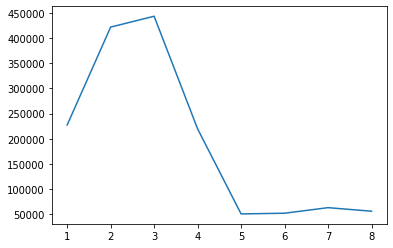

In [40]:
plt.plot(financial_trans['당기순이익'])